# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load and Explore the Dataset

In [2]:
# Load the dataset
data = pd.read_csv("C:\\Users\\lenovo\\Downloads\\MarketPricePrediction.csv")

In [3]:
# Display the first few rows of the dataset
print(data.head())

       market    month  year  quantity  priceMin  priceMax  priceMod state  \
0  ABOHAR(PB)  January  2005      2350       404       493       446    PB   
1  ABOHAR(PB)  January  2006       900       487       638       563    PB   
2  ABOHAR(PB)  January  2010       790      1283      1592      1460    PB   
3  ABOHAR(PB)  January  2011       245      3067      3750      3433    PB   
4  ABOHAR(PB)  January  2012      1035       523       686       605    PB   

     city          date  
0  ABOHAR  January-2005  
1  ABOHAR  January-2006  
2  ABOHAR  January-2010  
3  ABOHAR  January-2011  
4  ABOHAR  January-2012  


In [4]:
# Check for missing values
print(data.isnull().sum())

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64


In [5]:
# Summary statistics
print(data.describe())

               year      quantity      priceMin      priceMax      priceMod
count  10227.000000  1.022700e+04  10227.000000  10227.000000  10227.000000
mean    2009.022294  7.660488e+04    646.944363   1212.760731    984.284345
std        4.372841  1.244087e+05    673.121850    979.658874    818.471498
min     1996.000000  2.000000e+01     16.000000    145.000000     80.000000
25%     2006.000000  8.898000e+03    209.000000    557.000000    448.000000
50%     2009.000000  2.746000e+04    440.000000    923.000000    747.000000
75%     2013.000000  8.835650e+04    828.000000   1527.000000   1248.000000
max     2016.000000  1.639032e+06   6000.000000   8192.000000   6400.000000


C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


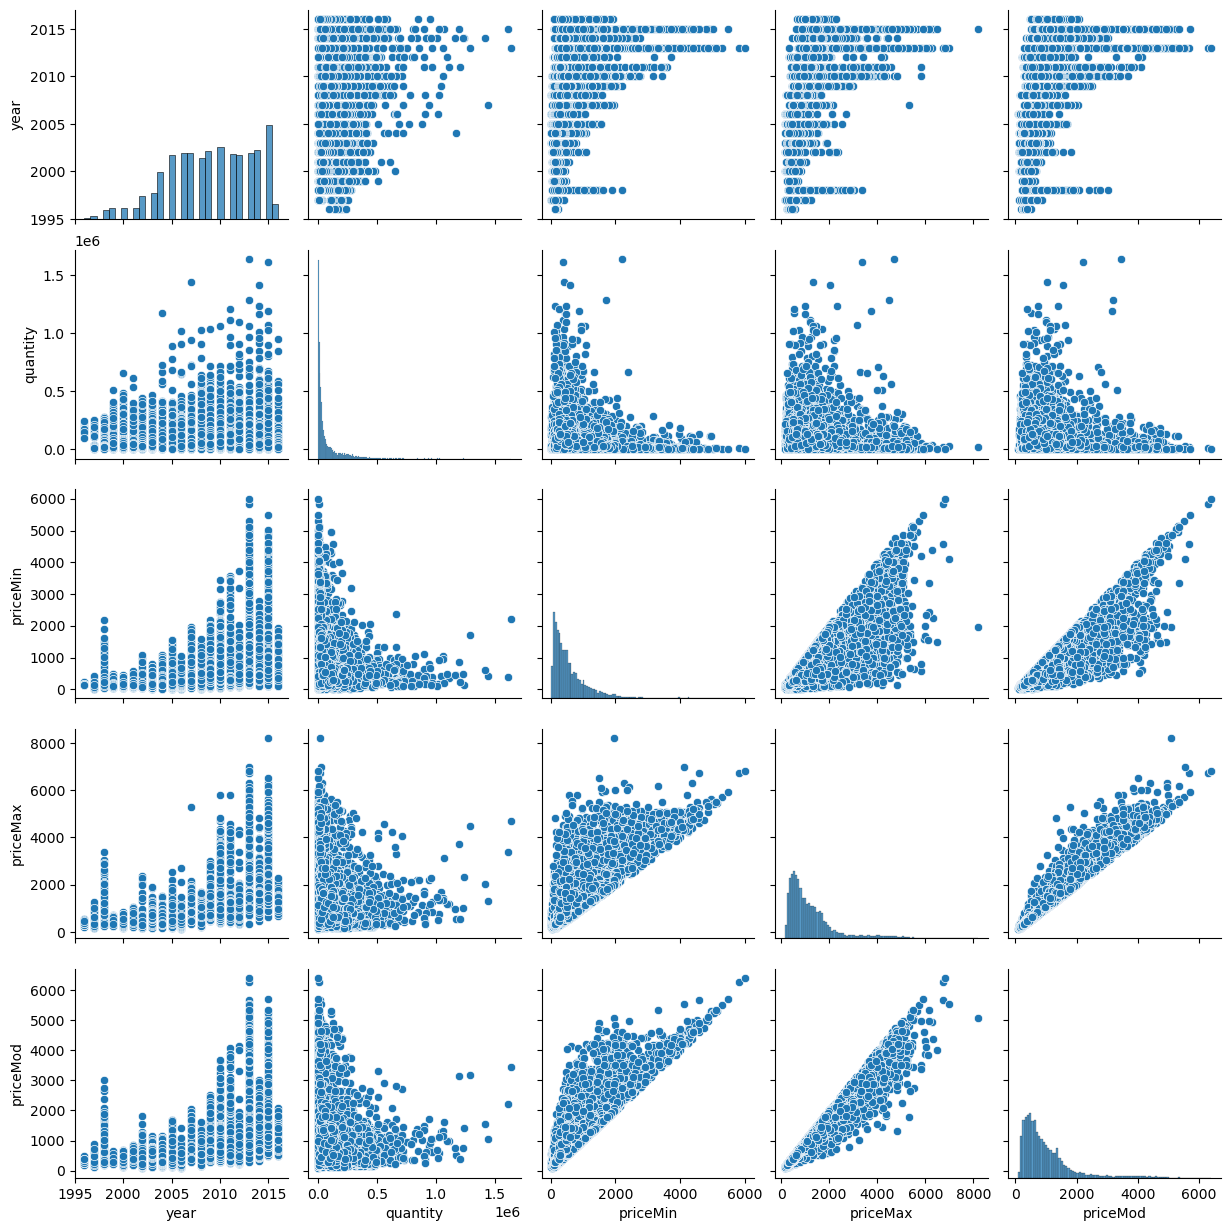

In [6]:
# Visualize data distribution and relationships
sns.pairplot(data)
plt.show()

# Data Preprocessing

In [7]:
# Handle missing values (fill forward)
data.fillna(method='ffill', inplace=True)

In [8]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['market'] = label_encoder.fit_transform(data['market'])
data['state'] = label_encoder.fit_transform(data['state'])
data['city'] = label_encoder.fit_transform(data['city'])

In [9]:
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8684\4002541597.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'])


In [10]:
# Set 'date' column as index
data.set_index('date', inplace=True)

# Exploratory Data Analysis (EDA)

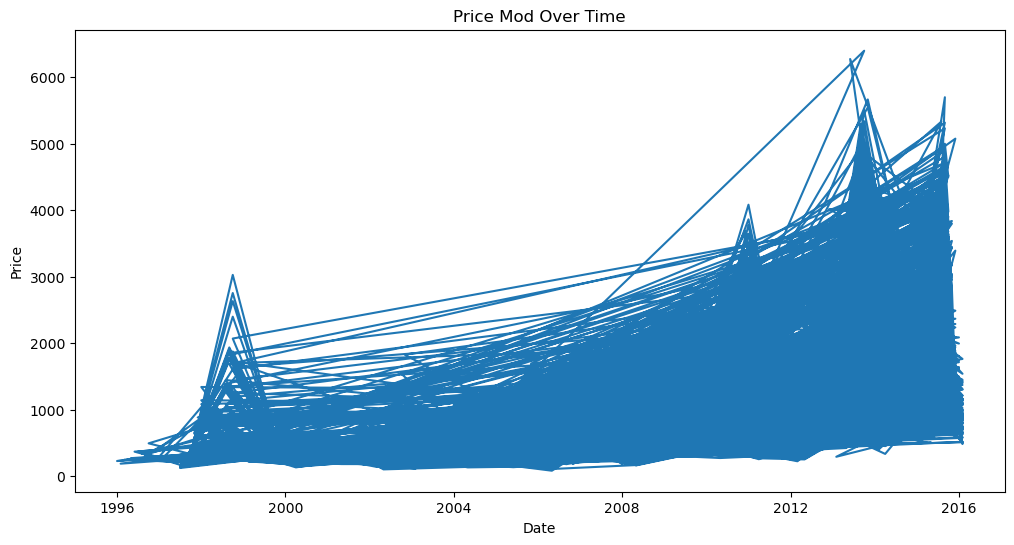

In [11]:
# Visualize time series data
plt.figure(figsize=(12, 6))
plt.plot(data['priceMod'])
plt.title('Price Mod Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

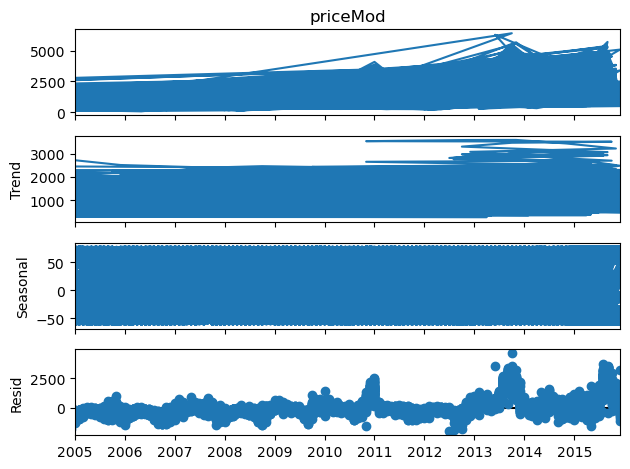

In [12]:
# Decompose time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(data['priceMod'], model='additive', period=12)
decomposition.plot()
plt.show()

# Feature Engineering

In [13]:
# Create lagged variables
data['priceMod_lag1'] = data['priceMod'].shift(1)
data['priceMod_lag2'] = data['priceMod'].shift(2)

In [14]:
# Create rolling statistics (e.g., moving average)
data['rolling_mean'] = data['priceMod'].rolling(window=12).mean()
data['rolling_std'] = data['priceMod'].rolling(window=12).std()

In [15]:
# Create seasonal indicators (e.g., month)
data['month'] = data.index.month

# Model Selection and Training

In [18]:
# Split data into train and test sets
X = data.drop('priceMod', axis=1)
y = data['priceMod']
train_size = int(len(data) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

## ARIMA

In [19]:
from statsmodels.tsa.arima.model import ARIMA

# Define the model
arima_model = ARIMA(y_train, order=(p,d,q))  # Replace p, d, q with suitable values
arima_fit = arima_model.fit()

# Summary of the model
print(arima_fit.summary())

# Make predictions
arima_predictions = arima_fit.forecast(steps=len(y_test))

# Evaluate the model
arima_mae = mean_absolute_error(y_test, arima_predictions)
arima_mse = mean_squared_error(y_test, arima_predictions)
arima_rmse = np.sqrt(arima_mse)
print("ARIMA MAE:", arima_mae)
print("ARIMA MSE:", arima_mse)
print("ARIMA RMSE:", arima_rmse)

C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting

                               SARIMAX Results                                
Dep. Variable:               priceMod   No. Observations:                 8181
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -65681.894
Date:                Wed, 29 May 2024   AIC                         131371.787
Time:                        20:25:11   BIC                         131399.826
Sample:                             0   HQIC                        131381.374
                               - 8181                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        998.9698     34.762     28.738      0.000     930.838    1067.101
ar.L1          0.8312      0.012     69.725      0.000       0.808       0.855
ma.L1         -0.5544      0.017    -32.479      0.0

C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# SARIMA

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the model with chosen parameters
sarima_model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the model
sarima_fit = sarima_model.fit()

# Summary of the model
print(sarima_fit.summary())

# Make predictions
sarima_predictions = sarima_fit.forecast(steps=len(y_test))

# Evaluate the model
sarima_mae = mean_absolute_error(y_test, sarima_predictions)
sarima_mse = mean_squared_error(y_test, sarima_predictions)
sarima_rmse = np.sqrt(sarima_mse)
print("SARIMA MAE:", sarima_mae)
print("SARIMA MSE:", sarima_mse)
print("SARIMA RMSE:", sarima_rmse)

C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting

                                     SARIMAX Results                                      
Dep. Variable:                           priceMod   No. Observations:                 8181
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -65471.936
Date:                            Wed, 29 May 2024   AIC                         130953.872
Time:                                    20:30:28   BIC                         130988.912
Sample:                                         0   HQIC                        130965.853
                                           - 8181                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1404      0.010     13.531      0.000       0.120       0.161
ma.L1         -0.9201      0.004   

C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# LINEAR REGRESSION

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Assuming 'data' is your DataFrame containing both numerical and categorical columns
# Split data into train and test sets
X = data.drop('priceMod', axis=1)
y = data['priceMod']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Define the model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('linear_regression', LinearRegression())
])

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Training R^2:", train_score)
print("Testing R^2:", test_score)


Training R^2: 0.9817875163953149
Testing R^2: 0.9770386345830588


# Model Evaluation

In [58]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Mean Absolute Error:")
print("LR Mean Absolute Error:", mae)
print("ARIMA Mean Absolute Error:", arima_mae)
print("SARIMA Mean Absolute Error:", sarima_mae)

print("Mean Squared Error:")
print("LR Mean Squared Error:", mse)
print("ARIMA Mean Squared Error:", arima_mse)
print("SARIMA Mean Squared Error:", sarima_mse)

print("Root Mean Squared Error:")
print("LR Root Mean Squared Error:", rmse)
print("ARIMA Root Mean Squared Error:", arima_rmse)
print("SARIMA Root Mean Squared Error:", sarima_rmse)

Mean Absolute Error:
LR Mean Absolute Error: 65.20327878864735
ARIMA Mean Absolute Error: 557.5536899879377
SARIMA Mean Absolute Error: 514.3641731042701
Mean Squared Error:
LR Mean Squared Error: 16728.79684658512
ARIMA Mean Squared Error: 600227.6712467435
SARIMA Mean Squared Error: 607509.9364731963
Root Mean Squared Error:
LR Root Mean Squared Error: 129.33985018773262
ARIMA Root Mean Squared Error: 774.7436164607899
SARIMA Root Mean Squared Error: 779.4292376304576


# Fine-tuning and Validation 

In [62]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from statsmodels.tsa.arima.model import ARIMA

# Define a function to evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # Split into train and test sets
    train_size = int(len(X) * 0.8)
    train, test = X[0:train_size], X[train_size:]
    # Fit the model
    model = ARIMA(train, order=arima_order)
    model_fit = model.fit()
    # Make predictions
    predictions = model_fit.forecast(steps=len(test))
    # Calculate error metrics
    mae = mean_absolute_error(test, predictions)
    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

# Evaluate different ARIMA configurations
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1, 2]

best_score, best_cfg = float("inf"), None
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            try:
                mae, mse, rmse = evaluate_arima_model(y_train, order)
                if rmse < best_score:
                    best_score, best_cfg = rmse, order
                print(f"ARIMA{order} MAE={mae:.3f}, MSE={mse:.3f}, RMSE={rmse:.3f}")
            except:
                continue

print(f"Best ARIMA{best_cfg} RMSE={best_score:.3f}")


C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting

ARIMA(0, 0, 0) MAE=567.092, MSE=640279.640, RMSE=800.175


C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored

ARIMA(0, 0, 1) MAE=567.093, MSE=640287.293, RMSE=800.180


C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored

ARIMA(0, 0, 2) MAE=567.098, MSE=640349.757, RMSE=800.219
ARIMA(0, 1, 0) MAE=734.712, MSE=786267.313, RMSE=886.717


C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored

ARIMA(0, 1, 1) MAE=567.228, MSE=640276.833, RMSE=800.173


C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored

ARIMA(0, 1, 2) MAE=567.141, MSE=640285.939, RMSE=800.179
ARIMA(1, 0, 0) MAE=567.093, MSE=640286.919, RMSE=800.179


C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored

ARIMA(1, 0, 1) MAE=567.100, MSE=640366.524, RMSE=800.229


C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored

ARIMA(1, 0, 2) MAE=567.105, MSE=640385.524, RMSE=800.241
ARIMA(1, 1, 0) MAE=834.202, MSE=928574.449, RMSE=963.626


C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored

ARIMA(1, 1, 1) MAE=567.077, MSE=640287.010, RMSE=800.179


C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored

ARIMA(1, 1, 2) MAE=567.065, MSE=640274.838, RMSE=800.172


C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored

ARIMA(2, 0, 0) MAE=567.098, MSE=640346.858, RMSE=800.217


C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored

ARIMA(2, 0, 1) MAE=567.099, MSE=640353.099, RMSE=800.221


C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored

ARIMA(2, 0, 2) MAE=567.100, MSE=640369.698, RMSE=800.231
ARIMA(2, 1, 0) MAE=992.605, MSE=1206049.981, RMSE=1098.203


C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored

ARIMA(2, 1, 1) MAE=567.082, MSE=640346.532, RMSE=800.217
ARIMA(2, 1, 2) MAE=567.055, MSE=640200.356, RMSE=800.125
Best ARIMA(2, 1, 2) RMSE=800.125


C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\envs\matplotlib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
